<a href="https://colab.research.google.com/github/mohzary/python-deep-learning-f19/blob/master/ICP4/icp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task 1:**
**To find the correlation between ‘survived’ (target column) and ‘sex’ column for the Titanic use case**


In [0]:
import pandas as pd
import numpy as np
import random as rnd
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
# to handle files in google colab
import io
from google.colab import files

# machine learning
from sklearn.linear_model import LogisticRegression, RidgeClassifierCV
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score



In [4]:
# upload data file from local folder to google colab 
file1 = files.upload()

Saving train.csv to train.csv


In [5]:
# reading the data set using pandas data frame
for fn in file1.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(file1[fn])))

train_df = pd.read_csv(io.StringIO(file1['train.csv'].decode('utf-8')))

User uploaded file "train.csv" with length 61194 bytes


In [6]:
##describing data
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [94]:
# To find the correlation between ‘survived’ (target column) and ‘sex’ column 
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
1,1,0.742038
0,0,0.188908


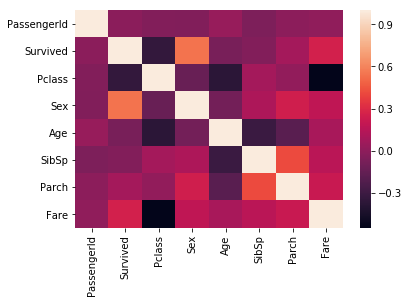

In [95]:
# to show correlation between 'survived' and othe columns
corr = train_df.corr()
sns.heatmap(corr)

**I think we should keep the sex feature because it has strong correlation with the class**

---



> Indented block



# **Task 2:**
**Implementing Naïve Bayes method using scikit-learn library**

In [9]:
# upload data file from local folder to google colab 
file2 = files.upload()

Saving glass.csv to glass.csv


In [10]:
# reading the data set using pandas data frame
for fn in file2.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(file2[fn])))

data_df = pd.read_csv(io.StringIO(file2['glass.csv'].decode('utf-8')))

User uploaded file "glass.csv" with length 10053 bytes


In [11]:
##describing data
print(data_df.columns.values)
print('_'*50)
data_df.info()

['RI' 'Na' 'Mg' 'Al' 'Si' 'K' 'Ca' 'Ba' 'Fe' 'Type']
__________________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
RI      214 non-null float64
Na      214 non-null float64
Mg      214 non-null float64
Al      214 non-null float64
Si      214 non-null float64
K       214 non-null float64
Ca      214 non-null float64
Ba      214 non-null float64
Fe      214 non-null float64
Type    214 non-null int64
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [12]:
##What is the distribution of numerical feature values across the samples
data_df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516523,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


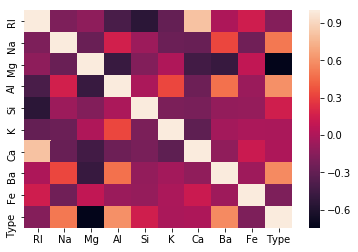

In [13]:
# to show correlation between 'type' and othe columns
corr1 = data_df.corr()
sns.heatmap(corr1)

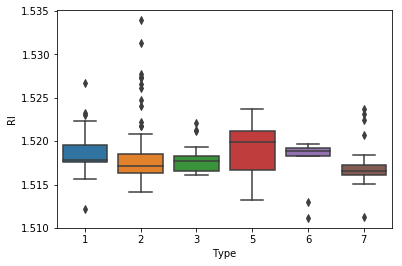

In [0]:
#To show the outlier in each column with the target coulmn
sns.boxplot('Type', 'RI', data =data_df)


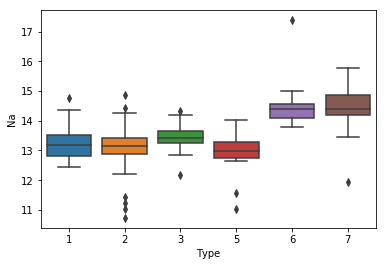

In [0]:
sns.boxplot('Type', 'Na', data =data_df)


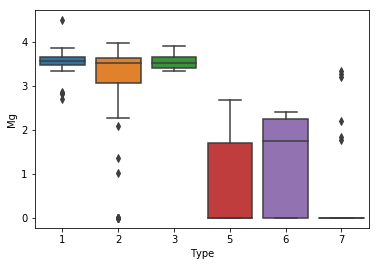

In [0]:
sns.boxplot('Type', 'Mg', data =data_df)


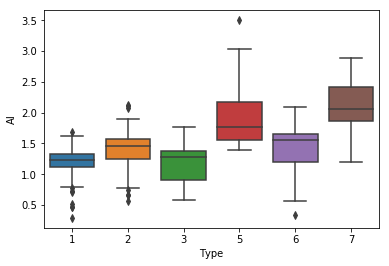

In [0]:
sns.boxplot('Type', 'Al', data =data_df)


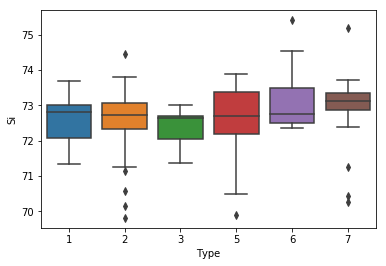

In [0]:
sns.boxplot('Type', 'Si', data =data_df)


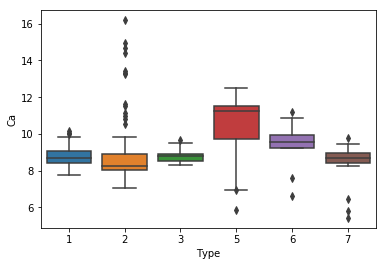

In [0]:
sns.boxplot('Type', 'Ca', data =data_df)


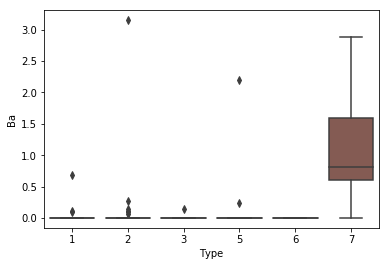

In [0]:
sns.boxplot('Type', 'Ba', data =data_df)


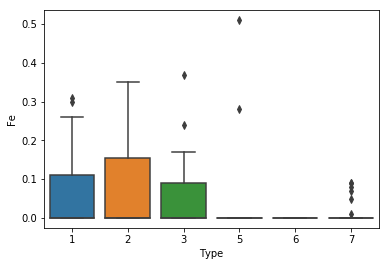

In [0]:
sns.boxplot('Type', 'Fe', data =data_df)

In [0]:
X = data_df.drop("Type",axis=1)
Y = data_df["Type"]

In [69]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0.00,0.00
7,1.51756,13.15,3.61,1.05,73.24,0.57,8.24,0.00,0.00
8,1.51918,14.04,3.58,1.37,72.08,0.56,8.30,0.00,0.00
9,1.51755,13.00,3.60,1.36,72.99,0.57,8.40,0.00,0.11


In [70]:
Y

0      1
1      1
2      1
3      1
4      1
5      1
6      1
7      1
8      1
9      1
10     1
11     1
12     1
13     1
14     1
15     1
16     1
17     1
18     1
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
      ..
184    6
185    7
186    7
187    7
188    7
189    7
190    7
191    7
192    7
193    7
194    7
195    7
196    7
197    7
198    7
199    7
200    7
201    7
202    7
203    7
204    7
205    7
206    7
207    7
208    7
209    7
210    7
211    7
212    7
213    7
Name: Type, Length: 214, dtype: int64

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0, stratify=Y)
print(len(X_train))

171


In [89]:
#Implementing Naïve Bayes
from sklearn.metrics import classification_report
gnb = GaussianNB()
gnb.fit(X_train, Y_train)
Y_pred = gnb.predict(X_test)

acc_gnb = round(gnb.score(X_test, Y_test) * 100, 2)
print("GNB accuracy is:",acc_gnb,"%")
print("_"*50)
print(classification_report(Y_test, Y_pred))

GNB accuracy is: 53.49 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.43      0.71      0.54        14
           2       0.75      0.20      0.32        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.53        43
   macro avg       0.59      0.60      0.56        43
weighted avg       0.60      0.53      0.50        43



# **Task 3:**
**Implementing SVM method using scikit-learn library**

In [90]:
#Implementing SVM
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_test, Y_test) * 100, 2)
print("svm accuracy is:", acc_svc, "%")
print("_"*50)
print(classification_report(Y_test, Y_pred))

svm accuracy is: 62.79 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.52      0.87      0.65        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         2
           7       1.00      0.67      0.80         6

    accuracy                           0.63        43
   macro avg       0.49      0.46      0.46        43
weighted avg       0.60      0.63      0.59        43



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Which algorithm you got better accuracy? Can you justify why?
SVM accuracy is much better in this case, and that is because of the

# **Task 4:**
**use the SVM with RBF kernel on the same dataset.**


In [91]:
#Implementing SVM
svc2 = SVC(kernel='rbf')

svc2.fit(X_train, Y_train)
Y_pred = svc2.predict(X_test)
acc_svc2 = round(svc2.score(X_test, Y_test) * 100, 2)
print("svm accuracy is:", acc_svc2, "%")
print("_"*50)
print(classification_report(Y_test, Y_pred))

svm accuracy is: 62.79 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.73      0.57      0.64        14
           2       0.52      0.87      0.65        15
           3       0.00      0.00      0.00         3
           5       0.67      0.67      0.67         3
           6       0.00      0.00      0.00         2
           7       1.00      0.67      0.80         6

    accuracy                           0.63        43
   macro avg       0.49      0.46      0.46        43
weighted avg       0.60      0.63      0.59        43



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [92]:
#Implementing SVM with linear kernal
svc3 = SVC(kernel='linear')

svc3.fit(X_train, Y_train)
Y_pred = svc3.predict(X_test)
acc_svc3 = round(svc3.score(X_test, Y_test) * 100, 2)
print("svm accuracy is:", acc_svc3, "%")
print("_"*50)
print(classification_report(Y_test, Y_pred))

svm accuracy is: 65.12 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.77      0.71      0.74        14
           2       0.55      0.73      0.63        15
           3       0.00      0.00      0.00         3
           5       0.50      0.67      0.57         3
           6       1.00      0.50      0.67         2
           7       0.80      0.67      0.73         6

    accuracy                           0.65        43
   macro avg       0.60      0.55      0.56        43
weighted avg       0.64      0.65      0.63        43



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [93]:
##KNN
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_test, Y_test) * 100, 2)
print("KNN accuracy is:",acc_knn,"%")

print("_"*50)
print(classification_report(Y_test, Y_pred))

KNN accuracy is: 67.44 %
__________________________________________________
              precision    recall  f1-score   support

           1       0.73      0.79      0.76        14
           2       0.65      0.87      0.74        15
           3       0.00      0.00      0.00         3
           5       1.00      0.67      0.80         3
           6       0.00      0.00      0.00         2
           7       0.75      0.50      0.60         6

    accuracy                           0.67        43
   macro avg       0.52      0.47      0.48        43
weighted avg       0.64      0.67      0.65        43



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
